In [1]:
import pandas as pd

file_path = 'data/20240408_processed.csv'

df = pd.read_csv(file_path, sep=';')

print(df)

         Time[date hh:mm:ss]   Elapsed Time [hh:mm:ss:ms]   Normalized s 1   \
0      2024-04-08 17:26:29.05              0.00:00:05:010             -0.64   
1      2024-04-08 17:26:34.05              0.00:00:10:009             -0.64   
2      2024-04-08 17:26:39.07              0.00:00:15:031             -0.64   
3      2024-04-08 17:26:44.08              0.00:00:20:042             -0.64   
4      2024-04-08 17:26:49.09              0.00:00:25:053             -0.64   
...                       ...                         ...               ...   
17266  2024-04-09 17:26:12.62              0.23:59:48:580             -0.81   
17267  2024-04-09 17:26:17.62              0.23:59:53:579             -0.81   
17268  2024-04-09 17:26:22.62              0.23:59:58:582             -0.81   
17269  2024-04-09 17:26:27.62              1.00:00:03:584             -0.81   
17270  2024-04-09 17:26:32.62              1.00:00:08:585             -0.81   

        Normalized s 2    Normalized s 3    S 0 [mW

In [2]:
df.dropna(axis=1, how='all', inplace=True)
print(df.shape)

(17271, 22)


In [3]:
from tabulate import tabulate
headers = df.columns.tolist()

headers_table = [[i, header] for i, header in enumerate(headers)]
transposed_headers_table = list(map(list, zip(*headers_table)))
print(tabulate(transposed_headers_table, tablefmt="grid"))

+---------------------+----------------------------+----------------+----------------+----------------+----------+----------+----------+----------+------------+----------------+--------+---------+---------+-----------+---------------+-----------------+------------+----------------+------------------+-------------------+---------------------+
| 0                   | 1                          | 2              | 3              | 4              | 5        | 6        | 7        | 8        | 9          | 10             | 11     | 12      | 13      | 14        | 15            | 16              | 17         | 18             | 19               | 20                | 21                  |
+---------------------+----------------------------+----------------+----------------+----------------+----------+----------+----------+----------+------------+----------------+--------+---------+---------+-----------+---------------+-----------------+------------+----------------+------------------+-----------

In [4]:
# access with headers[index] e.g.
print(headers[0])
print(df[headers[0]])

Time[date hh:mm:ss] 
0        2024-04-08 17:26:29.05
1        2024-04-08 17:26:34.05
2        2024-04-08 17:26:39.07
3        2024-04-08 17:26:44.08
4        2024-04-08 17:26:49.09
                  ...          
17266    2024-04-09 17:26:12.62
17267    2024-04-09 17:26:17.62
17268    2024-04-09 17:26:22.62
17269    2024-04-09 17:26:27.62
17270    2024-04-09 17:26:32.62
Name: Time[date hh:mm:ss] , Length: 17271, dtype: object


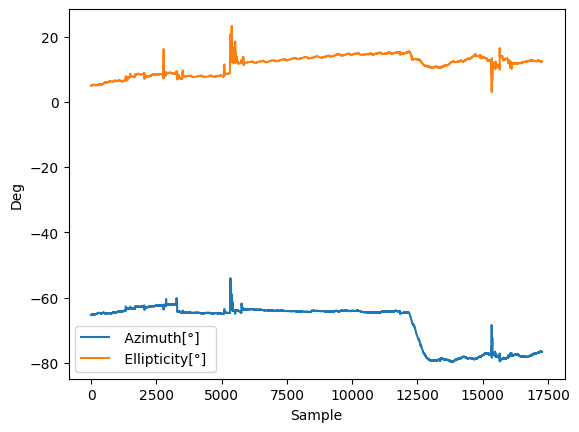

In [5]:
from matplotlib import pyplot as plt

azimuth = df[headers[9]]
ellipticity = df[headers[10]]

plt.plot(azimuth)
plt.plot(ellipticity)
plt.legend([headers[9], headers[10]])
plt.xlabel('Sample')
plt.ylabel('Deg')
plt.show()

In [6]:
azimuth = azimuth.to_numpy()
ellipticity = ellipticity.to_numpy()

## Conversion from Azimuth and Ellipticity

/usr/local/lib/python3.8/dist-packages/qutip/__init__.py:66: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


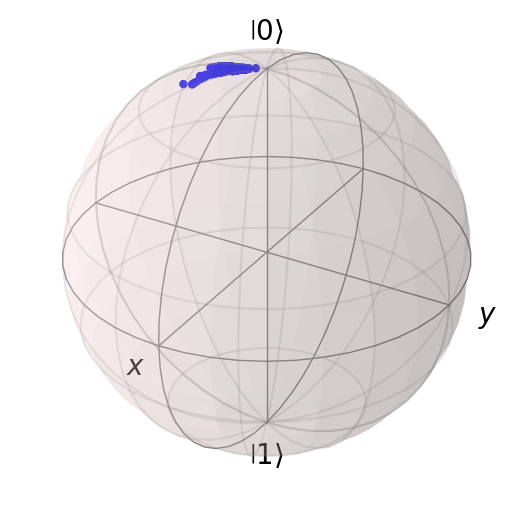

In [7]:
import numpy as np
import qutip as qt

theta = azimuth * (np.pi / 180)
phi = ellipticity * (np.pi / 180)
x = np.cos(theta) * np.sin(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(phi)

# Create the Bloch sphere plot
bloch_sphere = qt.Bloch()
trajectory = [x,y,z]

bloch_sphere.add_points(trajectory, meth='s')
bloch_sphere.show()

In [8]:
from tqdm import tqdm

  0%|          | 0/17270 [00:00<?, ?it/s]

100%|██████████| 17270/17270 [00:00<00:00, 102463.33it/s]


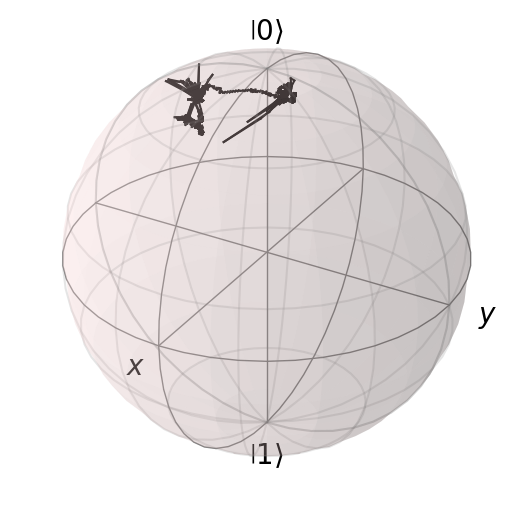

In [107]:
bloch_sphere = qt.Bloch()

lines = []
# print(len(trajectory[0]))
for i in range(len(trajectory[0])-1):
    current_point = (trajectory[0][i], trajectory[1][i], trajectory[2][i])
    next_point = (trajectory[0][i+1], trajectory[1][i+1], trajectory[2][i+1])
    # print(current_point)
    lines.append([current_point, next_point])

# print(lines)
for line in tqdm(lines):
    # print(line)
    bloch_sphere.add_line(line[0], line[1])
bloch_sphere.show()

## Plotting directly from measurements

In [9]:
s0 = df[headers[5]].to_numpy()
s1 = df[headers[6]].to_numpy()
s2 = df[headers[7]].to_numpy()
s3 = df[headers[8]].to_numpy()

s1_norm = df[headers[2]].to_numpy()
s2_norm = df[headers[3]].to_numpy()
s3_norm = df[headers[4]].to_numpy()

### Normalized Stokes Parameters

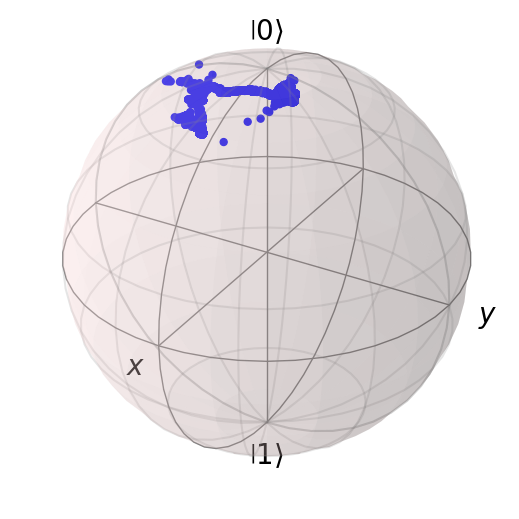

In [10]:
# Create the Bloch sphere plot
bloch_sphere = qt.Bloch()
trajectory = [s1_norm, s2_norm, s3_norm]

bloch_sphere.add_points(trajectory, meth='s')
bloch_sphere.show()

100%|██████████| 17270/17270 [00:00<00:00, 35041.91it/s]


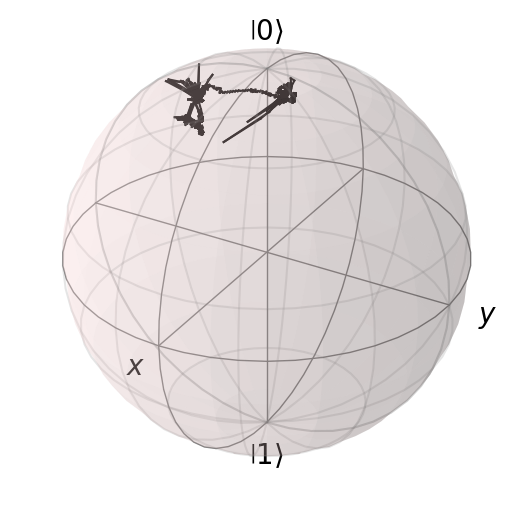

In [108]:
bloch_sphere = qt.Bloch()

lines = []
# print(len(trajectory[0]))
for i in range(len(trajectory[0])-1):
    current_point = (trajectory[0][i], trajectory[1][i], trajectory[2][i])
    next_point = (trajectory[0][i+1], trajectory[1][i+1], trajectory[2][i+1])
    # print(current_point)
    lines.append([current_point, next_point])

# print(lines)
for line in tqdm(lines):
    # print(list(line[0]), list(line[1]))
    bloch_sphere.add_line(list(line[0]), list(line[1]))
bloch_sphere.show()

In [15]:
from pylab import *
import qutip as qt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

fig = figure()
ax = Axes3D(fig,azim=-40,elev=30)
sphere = qt.Bloch(axes=ax)

sx = s1_norm
sy = s2_norm
sz = s3_norm

b = qt.Bloch()
b.vector_color = ['r']
b.view = [-40,30]
for i in tqdm(range(len(sx))):
    b.clear()
    b.add_vectors([sx[i+1],sy[i+1],sz[i+1]])
    b.add_points([sx[:i+1],sy[:i+1],sz[:i+1]])
    b.save(dirc='temp') #saving images to temp directory in current working directory

  0%|          | 0/17271 [00:00<?, ?it/s]

100%|█████████▉| 17270/17271 [1:15:43<00:00,  3.80it/s]


IndexError: index 17271 is out of bounds for axis 0 with size 17271

<Figure size 640x480 with 0 Axes>